In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.model_selection import learning_curve
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [131]:
data = pd.read_csv('data/wineQualityReds.csv')

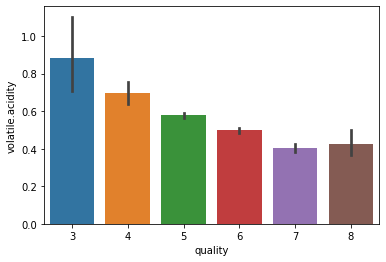

In [55]:
sns.barplot(x = 'quality', y = 'volatile.acidity', data = data)

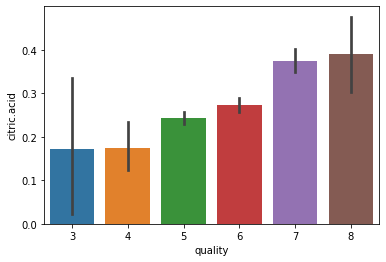

In [56]:
sns.barplot(x = 'quality', y = 'citric.acid', data = data)

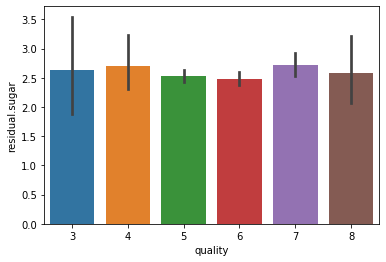

In [58]:
sns.barplot(x = 'quality', y = 'residual.sugar', data = data)

1599
1    855
0    744
Name: quality, dtype: int64


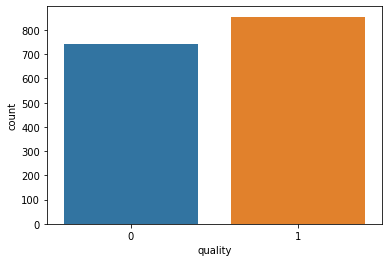

In [59]:
data['quality'] = data.quality.apply(lambda q: 0 if q <= 5 else 1)
y = data['quality']
print(len(y))
print(y.value_counts())
sns.countplot(y)

In [60]:
data.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [61]:
data.columns

Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [62]:
data = data.drop('Unnamed: 0', axis=1)

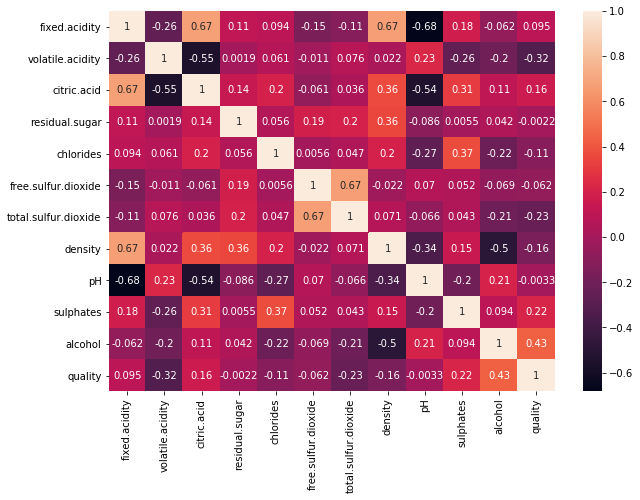

In [63]:
plt.figure(figsize=(10,7))
sns.heatmap(data[data.columns[0:]].corr(), annot=True)

In [64]:
x = data.drop('quality', axis=1)

In [65]:
from sklearn.model_selection import train_test_split

X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Plotting

### Learning Curve

In [16]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(classifier, x, y, title):
    n = len(y)
    train_size = np.linspace(0.1, 1.0, 10)
    
    _, train_scores, test_scores = learning_curve(classifier, x, y, train_sizes=train_size, cv=5)
    
    plt.figure()
    plt.plot(train_size, np.mean(train_scores, axis=1), 'o-', label="Training Score")
    plt.plot(train_size, np.mean(test_scores, axis=1), 'o-', label="Cross-Validation Score")
    plt.title(title)
    plt.xlabel("Fraction of DataSet")
    plt.ylabel("Classification Score")
    plt.legend(loc="best")
    plt.grid(axis='both')
    
    plt.savefig('WineSVMRBF.png')

### Validation Curve

In [27]:
from sklearn.model_selection import validation_curve

def plot_validation_curve(classifier, x, y, p, p_range, cv, title, attribute):
    train, test = validation_curve(classifier, x, y, param_name=p, param_range=p_range, cv=cv)
    
    title = 'Validation Curve for ' + title
    
    plt.figure(figsize=(7,5))
    plt.plot(p_range, np.mean(train, axis=1), label='Training Score')
    plt.plot(p_range, np.mean(test, axis=1), label='CV Score')
    plt.title(title)
    plt.xlabel(attribute)
    plt.ylabel('Classification Score')
    plt.legend(loc='best')
    plt.grid()
    
    plt.savefig('WineSVMLinearTuned.png')

# Algorithm

### Decision Tree

#### Untuned

In [91]:
## Untuned Classifier

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

def DT_Classifier(X_train, X_test, y_train, y_test, random_state):

    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    y_predicted = classifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_predicted) * 100
    
    return classifier, accuracy

In [92]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

def DTClassifier(X_train, X_test, y_train, y_test, criterion, max_depth, max_leaf_nodes, 
                 min_samples_leaf, min_samples_split, splitter, ccp):
    
    
    classifier = DecisionTreeClassifier(random_state=0, criterion=criterion, max_depth=max_depth, 
                                        max_leaf_nodes=max_leaf_nodes, min_samples_leaf=min_samples_leaf, 
                                        min_samples_split=min_samples_split, splitter=splitter, ccp_alpha = ccp)
    classifier.fit(X_train, y_train)
    
    y_predicted = classifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_predicted) * 100
    
    return classifier, accuracy

----------------------------------------------------------------------------------------
Iteration Number:  1
Decision Tree Score:  57.8125


----------------------------------------------------------------------------------------
Iteration Number:  1
Decision Tree Score:  60.9375


----------------------------------------------------------------------------------------
Iteration Number:  1
Decision Tree Score:  57.03125


----------------------------------------------------------------------------------------
Iteration Number:  1
Decision Tree Score:  67.96875


----------------------------------------------------------------------------------------
Iteration Number:  1
Decision Tree Score:  67.05882352941175




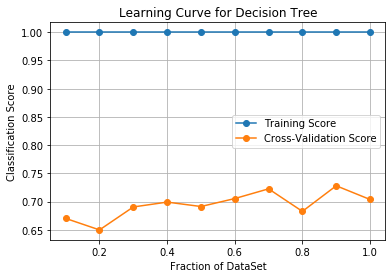

In [93]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

DecisionTreeScore = []
DT_classifier = []

i = 1

for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    ## Decision Tree
    classifier, accuracy = DT_Classifier(X_train, X_test, y_train, y_test, random_state=0)
    DecisionTreeScore.append(accuracy)
    DT_classifier.append(classifier)
    print("Decision Tree Score: ", accuracy)
    print("\n")

index = DecisionTreeScore.index(max(DecisionTreeScore))
best_classifier = DT_classifier[index]
plot_learning_curve(best_classifier, X_real_train, y_real_train, title="Learning Curve for Decision Tree")

#### Hyperparameter Tuning

In [104]:
from sklearn.model_selection import GridSearchCV
import time

ccp = np.linspace(1e-3, 1, 100)


parameters = [{'criterion': ['gini', 'entropy'], 
               'splitter': ['best', 'random'], 
               'min_samples_split': [2, 3, 4, 5], 
               'min_samples_leaf': [1, 2, 3, 4], 
               'min_impurity_decrease': [0.0, 0.05, 0.1, 0.15, 0.2]}]


t0 = time.time()
print("Searching:")
classifier = GridSearchCV(DecisionTreeClassifier(max_depth=5, ccp_alpha=0.001), parameters, 'accuracy')
classifier.fit(X_train, y_train)
t1 = time.time()
total_time = t1 - t0

print("Total time taken: ", total_time)
print(classifier.best_params_)

Searching:
Total time taken:  7.969821214675903
{'criterion': 'gini', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'best'}


#### Validation Curve

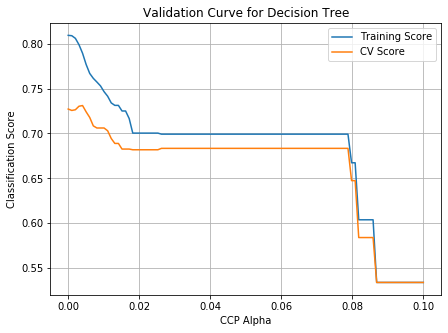

In [102]:
parameter = 'ccp_alpha'
parameter_range = np.linspace(1e-5, 0.1, 100)
plot_validation_curve(DecisionTreeClassifier(max_depth=5),
                      X_real_train, y_real_train, 
                      parameter, parameter_range, cv=5, title='Decision Tree', attribute='CCP Alpha')

#### Retest

----------------------------------------------------------------------------------------
Iteration Number:  1
Tuned Decision Tree Score:  70.3125


----------------------------------------------------------------------------------------
Iteration Number:  2
Tuned Decision Tree Score:  71.484375


----------------------------------------------------------------------------------------
Iteration Number:  3
Tuned Decision Tree Score:  73.046875


----------------------------------------------------------------------------------------
Iteration Number:  4
Tuned Decision Tree Score:  73.828125


----------------------------------------------------------------------------------------
Iteration Number:  5
Tuned Decision Tree Score:  78.03921568627452


Average Scores: 
Tuned Decision Tree Average Score:  73.3422181372549


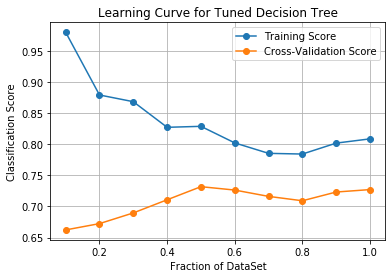

In [132]:
## Retest

kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

DecisionTreeScore = []
DT_classifier = []

i = 1

for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    

    ## Decision Tree
    classifier, accuracy = DTClassifier(X_train, X_test, y_train, y_test, max_depth=5, criterion='gini',
                                        max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, 
                                        splitter='best', ccp=0.001)
    DecisionTreeScore.append(accuracy)
    DT_classifier.append(classifier)
    print("Tuned Decision Tree Score: ", accuracy)
    print("\n")
    
    i += 1

print("Average Scores: ")
print("Tuned Decision Tree Average Score: ", sum(DecisionTreeScore)/len(DecisionTreeScore))
    
index = DecisionTreeScore.index(max(DecisionTreeScore))
best_classifier = DT_classifier[index]
plot_learning_curve(best_classifier, X_real_train, y_real_train, title="Learning Curve for Tuned Decision Tree")

Final_DT_Classifier = best_classifier

### Neural Network

In [129]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

def ANN_Tuned(X_train, X_test, y_train, y_test, solver, alpha, hidden_layer_sizes):
    classifier = MLPClassifier(solver=solver, alpha=alpha, 
                               hidden_layer_sizes=hidden_layer_sizes, random_state=0, max_iter=5000)
    classifier.fit(X_train, y_train)
    
    y_predicted = classifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_predicted) * 100
    
    return classifier, accuracy

In [121]:
from sklearn.neural_network import MLPClassifier

def ANN(X_train, X_test, y_train, y_test):
    classifier = MLPClassifier(random_state=0, max_iter=5000)
    classifier.fit(X_train, y_train)
    
    y_predicted = classifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_predicted) * 100
    
    return classifier, accuracy

#### Untuned

----------------------------------------------------------------------------------------
Iteration Number:  1
Neural Network Score:  75.0


----------------------------------------------------------------------------------------
Iteration Number:  2
Neural Network Score:  74.609375


----------------------------------------------------------------------------------------
Iteration Number:  3
Neural Network Score:  59.765625


----------------------------------------------------------------------------------------
Iteration Number:  4
Neural Network Score:  71.09375


----------------------------------------------------------------------------------------
Iteration Number:  5
Neural Network Score:  77.64705882352942


Average Scores: 
Neural Network Score:  71.62316176470588


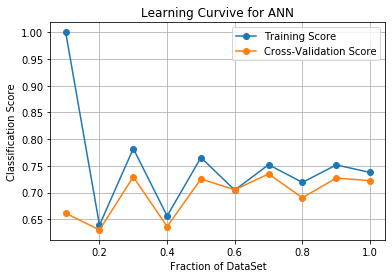

In [125]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

NeuralNetworkScore = []
NN_classifier = []

i = 1

for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    
    ## Neural Network
    classifier, accuracy = ANN(X_train, X_test, y_train, y_test)
    NeuralNetworkScore.append(accuracy)
    NN_classifier.append(classifier)
    print("Neural Network Score: ", accuracy)
    print("\n")
    
    i += 1
    

print("Average Scores: ")
print("Neural Network Score: ", sum(NeuralNetworkScore)/len(NeuralNetworkScore))


## Plot Learning Curve

index = NeuralNetworkScore.index(max(NeuralNetworkScore))
best_classifier = NN_classifier[index]
plot_learning_curve(best_classifier, X_real_train, y_real_train, title="Learning Curvive for ANN")


#### Hyperparameter Tuning

In [126]:
from sklearn.model_selection import GridSearchCV
import time

alpha = np.linspace(1e-4, 1e-1, 20)

parameters = [{'alpha': alpha}]


t0 = time.time()
print("Searching:")
classifier = GridSearchCV(MLPClassifier(max_iter=5000), parameters, 'accuracy')
classifier.fit(X_train, y_train)
t1 = time.time()
total_time = t1 - t0

print("Total time taken: ", total_time)
print(classifier.best_params_)

Searching:
Total time taken:  143.20737099647522
{'alpha': 0.05267894736842106}


#### Validation Curve

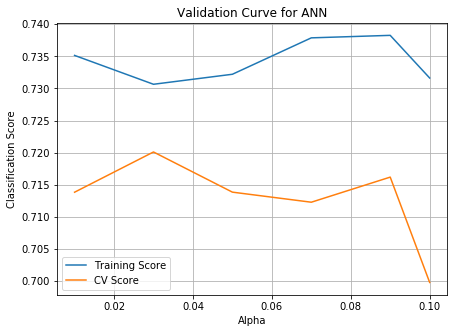

In [127]:
parameter = 'alpha'
parameter_range = [0.01, 0.03, 0.05, 0.07, 0.09, 0.1]
plot_validation_curve(MLPClassifier(max_iter=5000),
                      X_real_train, y_real_train, 
                      parameter, parameter_range, cv=5, title='ANN', attribute="Alpha")

#### Retest

----------------------------------------------------------------------------------------
Iteration Number:  1
Neural Network Score:  77.34375


----------------------------------------------------------------------------------------
Iteration Number:  2
Neural Network Score:  74.609375


----------------------------------------------------------------------------------------
Iteration Number:  3
Neural Network Score:  59.765625


----------------------------------------------------------------------------------------
Iteration Number:  4
Neural Network Score:  72.65625


----------------------------------------------------------------------------------------
Iteration Number:  5
Neural Network Score:  77.25490196078432


Average Scores: 
Neural Network Score:  72.32598039215686


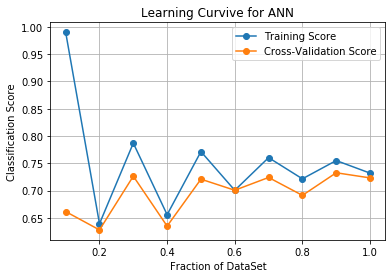

In [133]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

NeuralNetworkScore = []
NN_classifier = []

i = 1

for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    ## Neural Network
    classifier, accuracy = ANN_Tuned(X_train, X_test, y_train, y_test, solver='adam', 
                                     alpha=0.03, hidden_layer_sizes=(100,))
    NeuralNetworkScore.append(accuracy)
    NN_classifier.append(classifier)
    print("Neural Network Score: ", accuracy)
    print("\n")
    
    i += 1
    

print("Average Scores: ")
print("Neural Network Score: ", sum(NeuralNetworkScore)/len(NeuralNetworkScore))



## Plot Learning Curve

index = NeuralNetworkScore.index(max(NeuralNetworkScore))
best_classifier = NN_classifier[index]
plot_learning_curve(best_classifier, X_real_train, y_real_train, title="Learning Curvive for ANN")
final_nn_classifier = best_classifier

### Boosting

In [89]:
from sklearn.ensemble import AdaBoostClassifier

def Boosting(X_train, X_test, y_train_, y_test):
    classifier = AdaBoostClassifier(random_state=0)
    classifier.fit(X_train, y_train)
    
    y_predicted = classifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_predicted) * 100
    
    
    return classifier, accuracy

In [87]:
from sklearn.ensemble import AdaBoostClassifier

def Boosting_tuned(X_train, X_test, y_train, y_test, n_estimators, learning_rate):
    classifier = AdaBoostClassifier(random_state=0)
    classifier.fit(X_train, y_train)
    
    y_predicted = classifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_predicted) * 100
    
    return classifier, accuracy

#### Untuned

----------------------------------------------------------------------------------------
Iteration Number:  1
Boosting Score:  71.875


----------------------------------------------------------------------------------------
Iteration Number:  2
Boosting Score:  69.140625


----------------------------------------------------------------------------------------
Iteration Number:  3
Boosting Score:  58.984375


----------------------------------------------------------------------------------------
Iteration Number:  4
Boosting Score:  74.21875


----------------------------------------------------------------------------------------
Iteration Number:  5
Boosting Score:  70.58823529411765


Boosting Score:  68.96139705882354


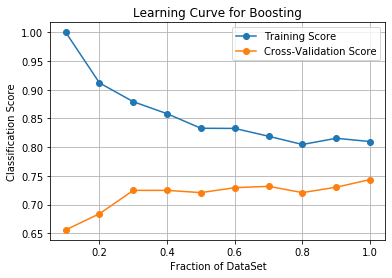

In [105]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

BoostingScore = []
BoostingClassifier = []
i = 1

for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    ## Boosting
    classifier, accuracy = Boosting(X_train, X_test, y_train, y_test)
    BoostingScore.append(accuracy)
    BoostingClassifier.append(classifier)
    print("Boosting Score: ", accuracy)
    print("\n")
    

    i += 1
    

print("Boosting Score: ", sum(BoostingScore)/len(BoostingScore))

index = BoostingScore.index(max(BoostingScore))
best_classifier = BoostingClassifier[index]
plot_learning_curve(best_classifier, X_real_train, y_real_train, title="Learning Curve for Boosting")

#### Hyperparameter Tuning

In [117]:
from sklearn.model_selection import GridSearchCV
import time

n_estimators = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
learning_rate = [0.2, 0.4, 0.6, 0.8, 1.0]

parameters = [{'learning_rate': learning_rate}]


t0 = time.time()
print("Searching:")
classifier = GridSearchCV(AdaBoostClassifier(n_estimators=23), parameters, 'accuracy')
classifier.fit(X_train, y_train)
t1 = time.time()
total_time = t1 - t0

print("Total time taken: ", total_time)
print(classifier.best_params_)

Searching:
Total time taken:  1.87972092628479
{'learning_rate': 0.2}


#### Validation Curve

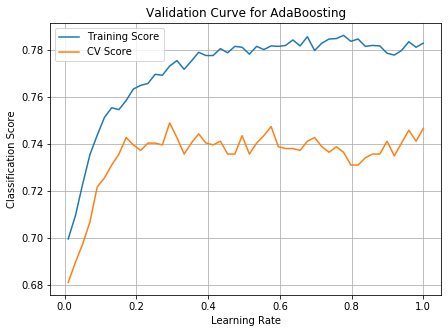

In [119]:
parameter = 'learning_rate'
parameter_range = np.linspace(1e-2, 1, 50)
plot_validation_curve(AdaBoostClassifier(n_estimators=23),
                      X_real_train, y_real_train, 
                      parameter, parameter_range, cv=5, title='AdaBoosting', attribute="Learning Rate")

#### Retest

----------------------------------------------------------------------------------------
Iteration Number:  1
Boosting Score:  71.875


----------------------------------------------------------------------------------------
Iteration Number:  2
Boosting Score:  69.140625


----------------------------------------------------------------------------------------
Iteration Number:  3
Boosting Score:  58.984375


----------------------------------------------------------------------------------------
Iteration Number:  4
Boosting Score:  74.21875


----------------------------------------------------------------------------------------
Iteration Number:  5
Boosting Score:  70.58823529411765


Boosting Score:  68.96139705882354


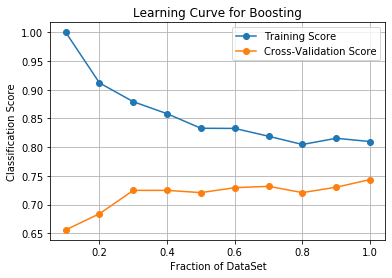

In [134]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

BoostingScore = []
BoostingClassifier = []
i = 1

for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    ## Boosting
    classifier, accuracy = Boosting_tuned(X_train, X_test, y_train, y_test, n_estimators=23, learning_rate=0.2)
    BoostingScore.append(accuracy)
    BoostingClassifier.append(classifier)
    print("Boosting Score: ", accuracy)
    print("\n")
    

    i += 1
    

print("Boosting Score: ", sum(BoostingScore)/len(BoostingScore))

index = BoostingScore.index(max(BoostingScore))
best_classifier = BoostingClassifier[index]
plot_learning_curve(best_classifier, X_real_train, y_real_train, title="Learning Curve for Boosting")
final_boosting_classifier = best_classifier

### Support Vector Machine

In [11]:
from sklearn import svm

def SupportVectorMachine(X_train, X_test, y_train, y_test, kernel):
    
    # Kernel 1
    classifier = svm.SVC(kernel=kernel, random_state=0)
    classifier.fit(X_train, y_train)
    
    y_predicted = classifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_predicted) * 100
    
    return classifier, accuracy

In [12]:
## Tuned Classifier

def SVM_Tuned(X_train, X_test, y_train, y_test, C, kernel, degree, gamma):
    
    classifier = svm.SVC(kernel=kernel, random_state=0, C=C, degree=degree, gamma=gamma)
    classifier.fit(X_train, y_train)
    
    y_predicted = classifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_predicted) * 100
    
    return classifier, accuracy

#### Untuned

----------------------------------------------------------------------------------------
Iteration Number:  1
SVM Score:  60.15625


----------------------------------------------------------------------------------------
Iteration Number:  2
SVM Score:  60.15625


----------------------------------------------------------------------------------------
Iteration Number:  3
SVM Score:  65.234375


----------------------------------------------------------------------------------------
Iteration Number:  4
SVM Score:  65.625


----------------------------------------------------------------------------------------
Iteration Number:  5
SVM Score:  64.70588235294117


Average Scores: 
SVM Linear Score:  63.17555147058823


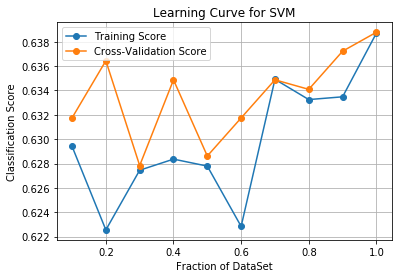

In [136]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)


SVMScore = []
SVMClassifier = []

i = 1

for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    ## Support Vector Machine
    classifier, accuracy = SupportVectorMachine(X_train, X_test, y_train, y_test,
                                              kernel='rbf')
    SVMScore.append(accuracy)
    SVMClassifier.append(classifier)
    print("SVM Score: ", accuracy)
    print("\n")
    
    i +=1 
    
print("Average Scores: ")
print("SVM Linear Score: ", sum(SVMScore)/len(SVMScore))




## Plot Learning Curve
index = SVMScore.index(max(SVMScore))
best_classifier = SVMClassifier[index]
plot_learning_curve(best_classifier, X_real_train, y_real_train, title="Learning Curve for SVM")

#### Hyperparameter Tuning

In [41]:
from sklearn.model_selection import GridSearchCV
import time


parameters = [{'kernel': ['rbf'], 
               'C': [3],
               'gamma': np.linspace(1e-5, 0.1, 50)}]


t0 = time.time()
print("Searching:")
classifier = GridSearchCV(svm.SVC(), parameters, 'accuracy')
classifier.fit(X_train, y_train)
t1 = time.time()
total_time = t1 - t0

print("Total time taken: ", total_time)
print(classifier.best_params_)

Searching:
Total time taken:  10.372749090194702
{'C': 3, 'gamma': 0.020416122448979595, 'kernel': 'rbf'}


#### Validation Curve

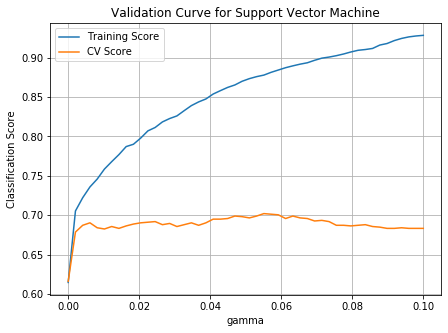

In [38]:
parameter = 'gamma'
parameter_range = np.linspace(1e-5, 0.1, 50)
plot_validation_curve(svm.SVC(kernel='rbf', C=3),
                      X_real_train, y_real_train, 
                      parameter, parameter_range, cv=5, title='Support Vector Machine', attribute='gamma')

#### Retest

----------------------------------------------------------------------------------------
Iteration Number:  1
SVM Score:  73.828125


----------------------------------------------------------------------------------------
Iteration Number:  2
SVM Score:  76.5625


----------------------------------------------------------------------------------------
Iteration Number:  3
SVM Score:  68.75


----------------------------------------------------------------------------------------
Iteration Number:  4
SVM Score:  73.828125


----------------------------------------------------------------------------------------
Iteration Number:  5
SVM Score:  76.47058823529412


Average Scores: 
SVM Linear Score:  73.88786764705883


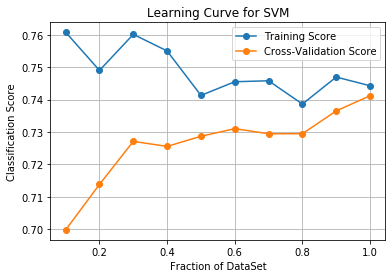

In [137]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)


SVMScore = []
SVMClassifier = []

i = 1

for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    ## Support Vector Machine
    classifier, accuracy = SVM_Tuned(X_train, X_test, y_train, y_test,
                                              kernel='linear', C=1.0, gamma='scale' , degree=3)
    SVMScore.append(accuracy)
    SVMClassifier.append(classifier)
    print("SVM Score: ", accuracy)
    print("\n")
    
    i +=1 
    
print("Average Scores: ")
print("SVM Linear Score: ", sum(SVMScore)/len(SVMScore))




## Plot Learning Curve
index = SVMScore.index(max(SVMScore))
best_classifier = SVMClassifier[index]
plot_learning_curve(best_classifier, X_real_train, y_real_train, title="Learning Curve for SVM")
final_svm_classifier = best_classifier

# kNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

def kNN(X_train, X_test, y_train, y_test):
    
    classifier = KNeighborsClassifier()
    classifier.fit(X_train, y_train)
    
    y_predicted = classifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_predicted) * 100
    
        
    return classifier, accuracy

In [71]:
def kNN_Tuned(X_train, X_test, y_train, y_test, k, p):
    
    classifier = KNeighborsClassifier(n_neighbors=k, p=p)
    classifier.fit(X_train, y_train)
    
    y_predicted = classifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_predicted) * 100
    
    return classifier, accuracy

----------------------------------------------------------------------------------------
Iteration Number:  1
kNN Score:  73.046875


----------------------------------------------------------------------------------------
Iteration Number:  2
kNN Score:  71.875


----------------------------------------------------------------------------------------
Iteration Number:  3
kNN Score:  63.671875


----------------------------------------------------------------------------------------
Iteration Number:  4
kNN Score:  70.3125


----------------------------------------------------------------------------------------
Iteration Number:  5
kNN Score:  70.58823529411765


Average Scores: 
kNN Score:  69.89889705882354


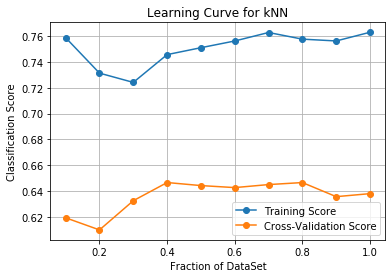

In [49]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

kNNScore = []
kNNClassifier = []
i = 1

for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    
    ## K-Nearest Neighbors
    classifier, accuracy = kNN(X_train, X_test, y_train, y_test)
    kNNScore.append(accuracy)
    kNNClassifier.append(classifier)
    print("kNN Score: ", accuracy)
    print("\n")
    
    i += 1
    

print("Average Scores: ")
print("kNN Score: ", sum(kNNScore)/len(kNNScore))


index = kNNScore.index(max(kNNScore))
best_classifier = kNNClassifier[index]
plot_learning_curve(best_classifier, X_real_train, y_real_train, title="Learning Curve for kNN")

#### Hyperparameter Tuning

In [80]:
from sklearn.model_selection import GridSearchCV
import time

k = [8]
p = [1.0, 2.0, 3.0]

parameters = [{'n_neighbors': k, 
               'p': p}]


t0 = time.time()
print("Searching:")
classifier = GridSearchCV(KNeighborsClassifier(), parameters, 'f1')
classifier.fit(X_train, y_train)
t1 = time.time()
total_time = t1 - t0

print("Total time taken: ", total_time)
print(classifier.best_params_)

Searching:
Total time taken:  0.3590679168701172
{'n_neighbors': 8, 'p': 3.0}


#### Validation Curve

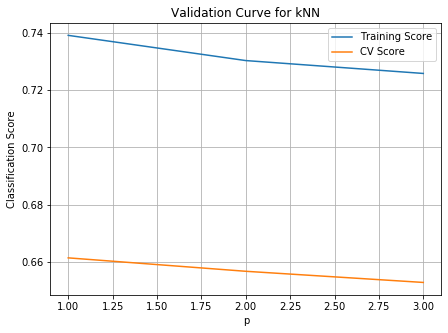

In [81]:
parameter = 'p'
parameter_range = [1.0, 2.0, 3.0]
plot_validation_curve(KNeighborsClassifier(n_neighbors=8),
                      X_real_train, y_real_train, 
                      parameter, parameter_range, cv=5, title='kNN', attribute="p")

#### Retest

----------------------------------------------------------------------------------------
Iteration Number:  1
kNN Score:  74.609375


----------------------------------------------------------------------------------------
Iteration Number:  2
kNN Score:  75.0


----------------------------------------------------------------------------------------
Iteration Number:  3
kNN Score:  64.0625


----------------------------------------------------------------------------------------
Iteration Number:  4
kNN Score:  69.140625


----------------------------------------------------------------------------------------
Iteration Number:  5
kNN Score:  76.47058823529412


Average Scores: 
kNN Score:  71.85661764705883


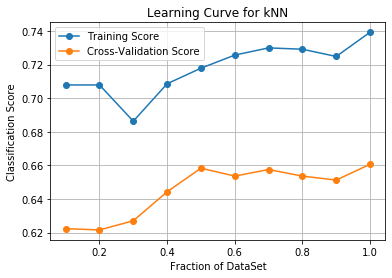

In [138]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_real_train)

kNNScore = []
kNNClassifier = []
i = 1


for train_index, test_index in kf.split(X_real_train):
    print("----------------------------------------------------------------------------------------")
    print("Iteration Number: ", i)
    X_train, X_test = X_real_train.iloc[train_index], X_real_train.iloc[test_index]
    y_train, y_test = y_real_train.iloc[train_index], y_real_train.iloc[test_index]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
#     y_train = y_train.apply(lambda q: 0 if q == B else 1)
#     y_test = y_test.apply(lambda q: 0 if q == B else 1)
    
    
    ## K-Nearest Neighbors
    classifier, score = kNN_Tuned(X_train, X_test, y_train, y_test, k=8, p=1.0)
    kNNScore.append(score)
    kNNClassifier.append(classifier)
    print("kNN Score: ", score)
    print("\n")
    
    i += 1
    

print("Average Scores: ")
print("kNN Score: ", sum(kNNScore)/len(kNNScore))


index = kNNScore.index(max(kNNScore))
best_classifier = kNNClassifier[index]
plot_learning_curve(best_classifier, X_real_train, y_real_train, title="Learning Curve for kNN")
final_knn_classifier = best_classifier

In [141]:
# Final_DT_Classifier
# final_knn_classifier
# final_svm_classifier
# final_boosting_classifier
# final_ann_classifier

# X_real_test
# y_real_test

DT_predicted = Final_DT_Classifier.predict(X_real_test)
DT_score = metrics.accuracy_score(DT_predicted, y_real_test)

print("Decision Tree Score: ", DT_score)

ANN_predicted = final_nn_classifier.predict(X_real_test)
ANN_score = metrics.accuracy_score(ANN_predicted, y_real_test)

print("ANN Score: ", ANN_score)

Boosting_predicted = final_boosting_classifier.predict(X_real_test)
Boosting_score = metrics.accuracy_score(Boosting_predicted, y_real_test)

print("Boosting Score: ", Boosting_score)

SVM_predicted = final_svm_classifier.predict(X_real_test)
SVM_score = metrics.accuracy_score(SVM_predicted, y_real_test)

print("SVM Score: ", SVM_score)

KNN_predicted = final_knn_classifier.predict(X_real_test)
KNN_score = metrics.accuracy_score(KNN_predicted, y_real_test)

print("KNN Score: ", KNN_score)

Decision Tree Score:  0.759375
ANN Score:  0.540625
Boosting Score:  0.609375
SVM Score:  0.75625
KNN Score:  0.4625
